In [1]:
import sys
sys.path.insert(0, '../src')

In [2]:
import torch
import numpy as np
import test
import matplotlib.pyplot as plt
from matplotlib import cm
from time import time
from importlib import reload
from itertools import permutations
import world
import glob
import plot
from scipy.sparse.csgraph import shortest_path
from copy import deepcopy
import analyse

In [3]:
def trajectory_len(trajectory):
    return abs(trajectory[1] - trajectory[0]) * 2 + 6

In [4]:
def make_trajectory_dict():
    trajectories = permutations(np.arange(6), r=2)
    trajectory_dict = {}
    for traj_idx, traj in enumerate(trajectories):
        trajectory_dict[traj] = traj_idx
    return trajectory_dict

In [5]:
def locations_in_trajectory(trajectory, environment):
    
    adjacency = np.array(self.adjacency) 
    dists, pred = shortest_path(adjacency, directed=False, method='FW', return_predecessors=True)

    trajectory_locs = [environment.locations[state_id] for state_id in self.get_path(pred, curr_arm_end_state, new_arm_end_state)][1:]
    

In [6]:
def print_proper_time(seconds):
    # hours
    if seconds > 3600:
        output_str = '{0} hours'.format(seconds / 3600)
    # minutes
    elif seconds > 60:
        output_str = '{0} minutes'.format(seconds / 60)
    # seconds
    else:
        output_str = '{0} seconds'.format(seconds)
    return 'Finished running in ' + output_str

In [3]:
IDX = '49999'

In [4]:
# 2022-04-21; run0 uses purely sweeping policy
DATE = '2022-08-04'
RUN = '0'
PATH = '/cumulus/cristofer/TEM_data/{0}/run{1}/model/'.format(DATE, RUN)
SAVE_DIR = '/cumulus/cristofer/TEM_figs/{0}/run{1}/'.format(DATE, RUN)

In [13]:
params = torch.load('/cumulus/cristofer/TEM_data/' + DATE + '/run' + RUN + '/model/params_' + IDX + '.pt')

# Make list of all the environments that this model was trained on
env_list = list(glob.iglob('/cumulus/cristofer/TEM_data/' + DATE + '/run' + RUN + '/script/envs/*'))

# Set which environments will include shiny objects
shiny_envs = [False, False, False, False]
# Set the number of walks to execute in parallel (batch size)
n_walks = len(shiny_envs)
# Select environments from the environments included in training
environments = [world.World(graph, randomise_observations=params['randomise_observations'], shiny=(params['shiny'] if shiny_envs[env_i] else None), specify_behavior=params['specify_behavior'], behavior_type=params['behavior_type'], seed=0) for env_i, graph in enumerate(np.random.choice(env_list, n_walks))]
BEHAVIOR_TYPE, BEHAVIOR_SEED = params['behavior_type'], params['behavior_seed']

In [20]:
BEHAVIOR_TYPE

'sweeping'

In [14]:
print('{0} behavior_type with seed {1}'.format(BEHAVIOR_TYPE, BEHAVIOR_SEED))

sweeping behavior_type with seed 2


In [15]:
fwd, mod, envs = test.get_forward(date=DATE, run=RUN, env_to_plot=0, index=IDX, seed=BEHAVIOR_SEED)

In [16]:
all_g_sweep, all_p_sweep = analyse.trajectories_rate_maps(fwd, mod, envs)

In [17]:
np.array(all_p_sweep[0][0][0])[:, 0]

array([-9.99000000e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -3.02945409e-06, -3.27090820e-05,
        0.00000000e+00, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
       -9.99000000e+02, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
       -9.99000000e+02, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
       -9.99000000e+02, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
       -9.99000000e+02, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
       -9.99000000e+02])

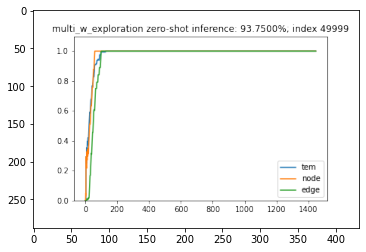

In [21]:
fig, ax = plt.subplots()#figsize=(100, 100))

im = plt.imread(SAVE_DIR + 'index_{0}_seed_{1}_performance.png'.format(IDX, BEHAVIOR_SEED))

ax.imshow(im)

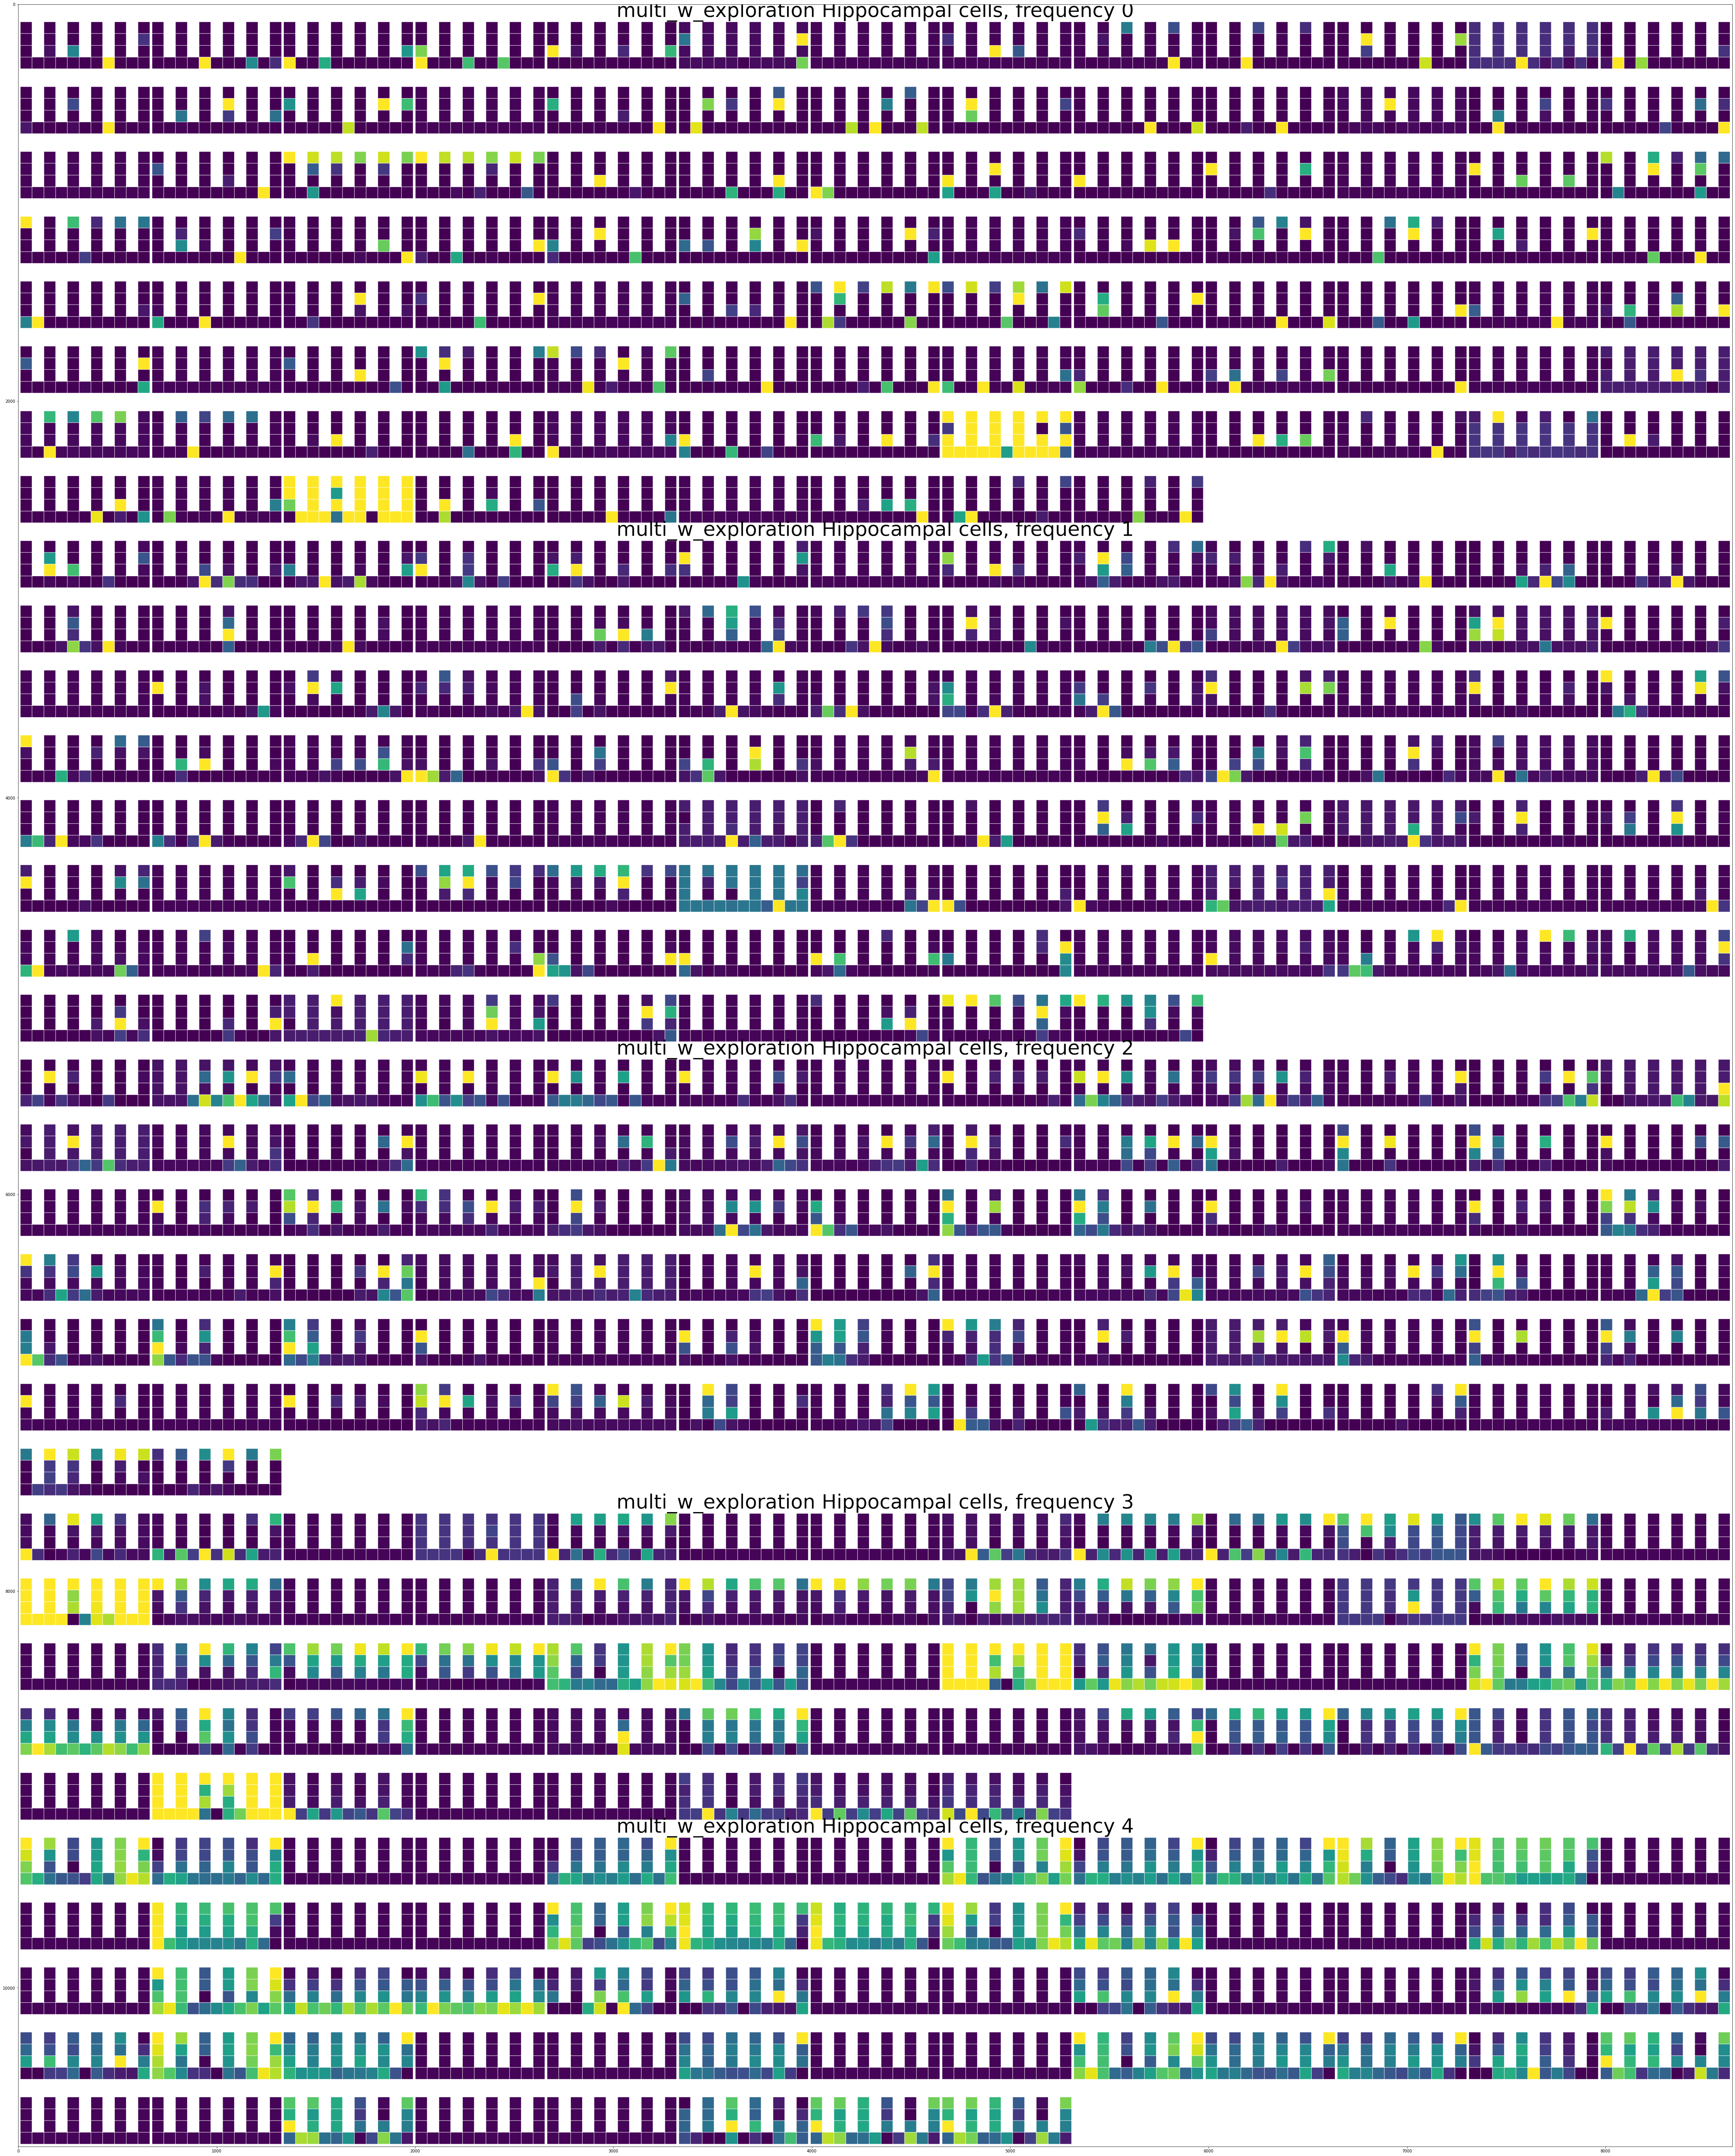

In [22]:
fig, ax = plt.subplots(figsize=(100, 100))

im = plt.imread(SAVE_DIR + 'index_{0}_seed_{1}_Hippocampal_cells.png'.format(IDX, BEHAVIOR_SEED))

ax.imshow(im)

In [ ]:
FREQUENCY = 0
plot.plot_single_frequency_all_cells_all_trajectories(all_p_sweep[0], frequency=FREQUENCY, environment=environments[0])

In [ ]:
FREQUENCY = 1
plot.plot_single_frequency_all_cells_all_trajectories(all_p_sweep[0], frequency=FREQUENCY, environment=environments[0])

In [ ]:
FREQUENCY = 2
plot.plot_single_frequency_all_cells_all_trajectories(all_p_sweep[0], frequency=FREQUENCY, environment=environments[0])

In [ ]:
FREQUENCY = 3
plot.plot_single_frequency_all_cells_all_trajectories(all_p_sweep[0], frequency=FREQUENCY, environment=environments[0])

In [ ]:
FREQUENCY = 4
plot.plot_single_frequency_all_cells_all_trajectories(all_p_sweep[0], frequency=FREQUENCY, environment=environments[0])

In [38]:
IDX2 = '47000'

In [39]:
# 2022-08-05; run0 uses random arm policy
DATE = '2022-08-05'
RUN = '0'
PATH = '/cumulus/cristofer/TEM_data/{0}/run{1}/model/'.format(DATE, RUN)
SAVE_DIR = '/cumulus/cristofer/TEM_figs/{0}/run{1}/'.format(DATE, RUN)

In [40]:
params = torch.load('/cumulus/cristofer/TEM_data/' + DATE + '/run' + RUN + '/model/params_' + IDX2 + '.pt')

# Make list of all the environments that this model was trained on
env_list = list(glob.iglob('/cumulus/cristofer/TEM_data/' + DATE + '/run' + RUN + '/script/envs/*'))

# Set which environments will include shiny objects
shiny_envs = [False, False, False, False]
# Set the number of walks to execute in parallel (batch size)
n_walks = len(shiny_envs)
# Select environments from the environments included in training
environments = [world.World(graph, randomise_observations=params['randomise_observations'], shiny=(params['shiny'] if shiny_envs[env_i] else None), specify_behavior=params['specify_behavior'], behavior_type=params['behavior_type'], seed=0) for env_i, graph in enumerate(np.random.choice(env_list, n_walks))]

BEHAVIOR_TYPE2, BEHAVIOR_SEED2 = params['behavior_type'], params['behavior_seed']

In [41]:
print('{0} behavior_type with seed {1}'.format(BEHAVIOR_TYPE2, BEHAVIOR_SEED2))

random_arms behavior_type with seed 2


In [42]:
fwd, mod, envs = test.get_forward(date=DATE, run=RUN, env_to_plot=0, index=IDX2, seed=BEHAVIOR_SEED2)

In [43]:
all_g_random, all_p_random = analyse.trajectories_rate_maps(fwd, mod, envs)

In [44]:
np.array(all_p_random[0][0][0])[:, 0]

array([-9.99000000e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.89890566e-04, -7.93523650e-05,
        0.00000000e+00, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
       -9.99000000e+02, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
       -9.99000000e+02, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
       -9.99000000e+02, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
       -9.99000000e+02, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
       -9.99000000e+02])

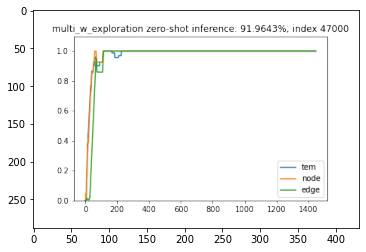

In [45]:
fig, ax = plt.subplots()#figsize=(100, 100))

im = plt.imread(SAVE_DIR + 'index_{0}_seed_{1}_performance.png'.format(IDX2, BEHAVIOR_SEED2))

ax.imshow(im)

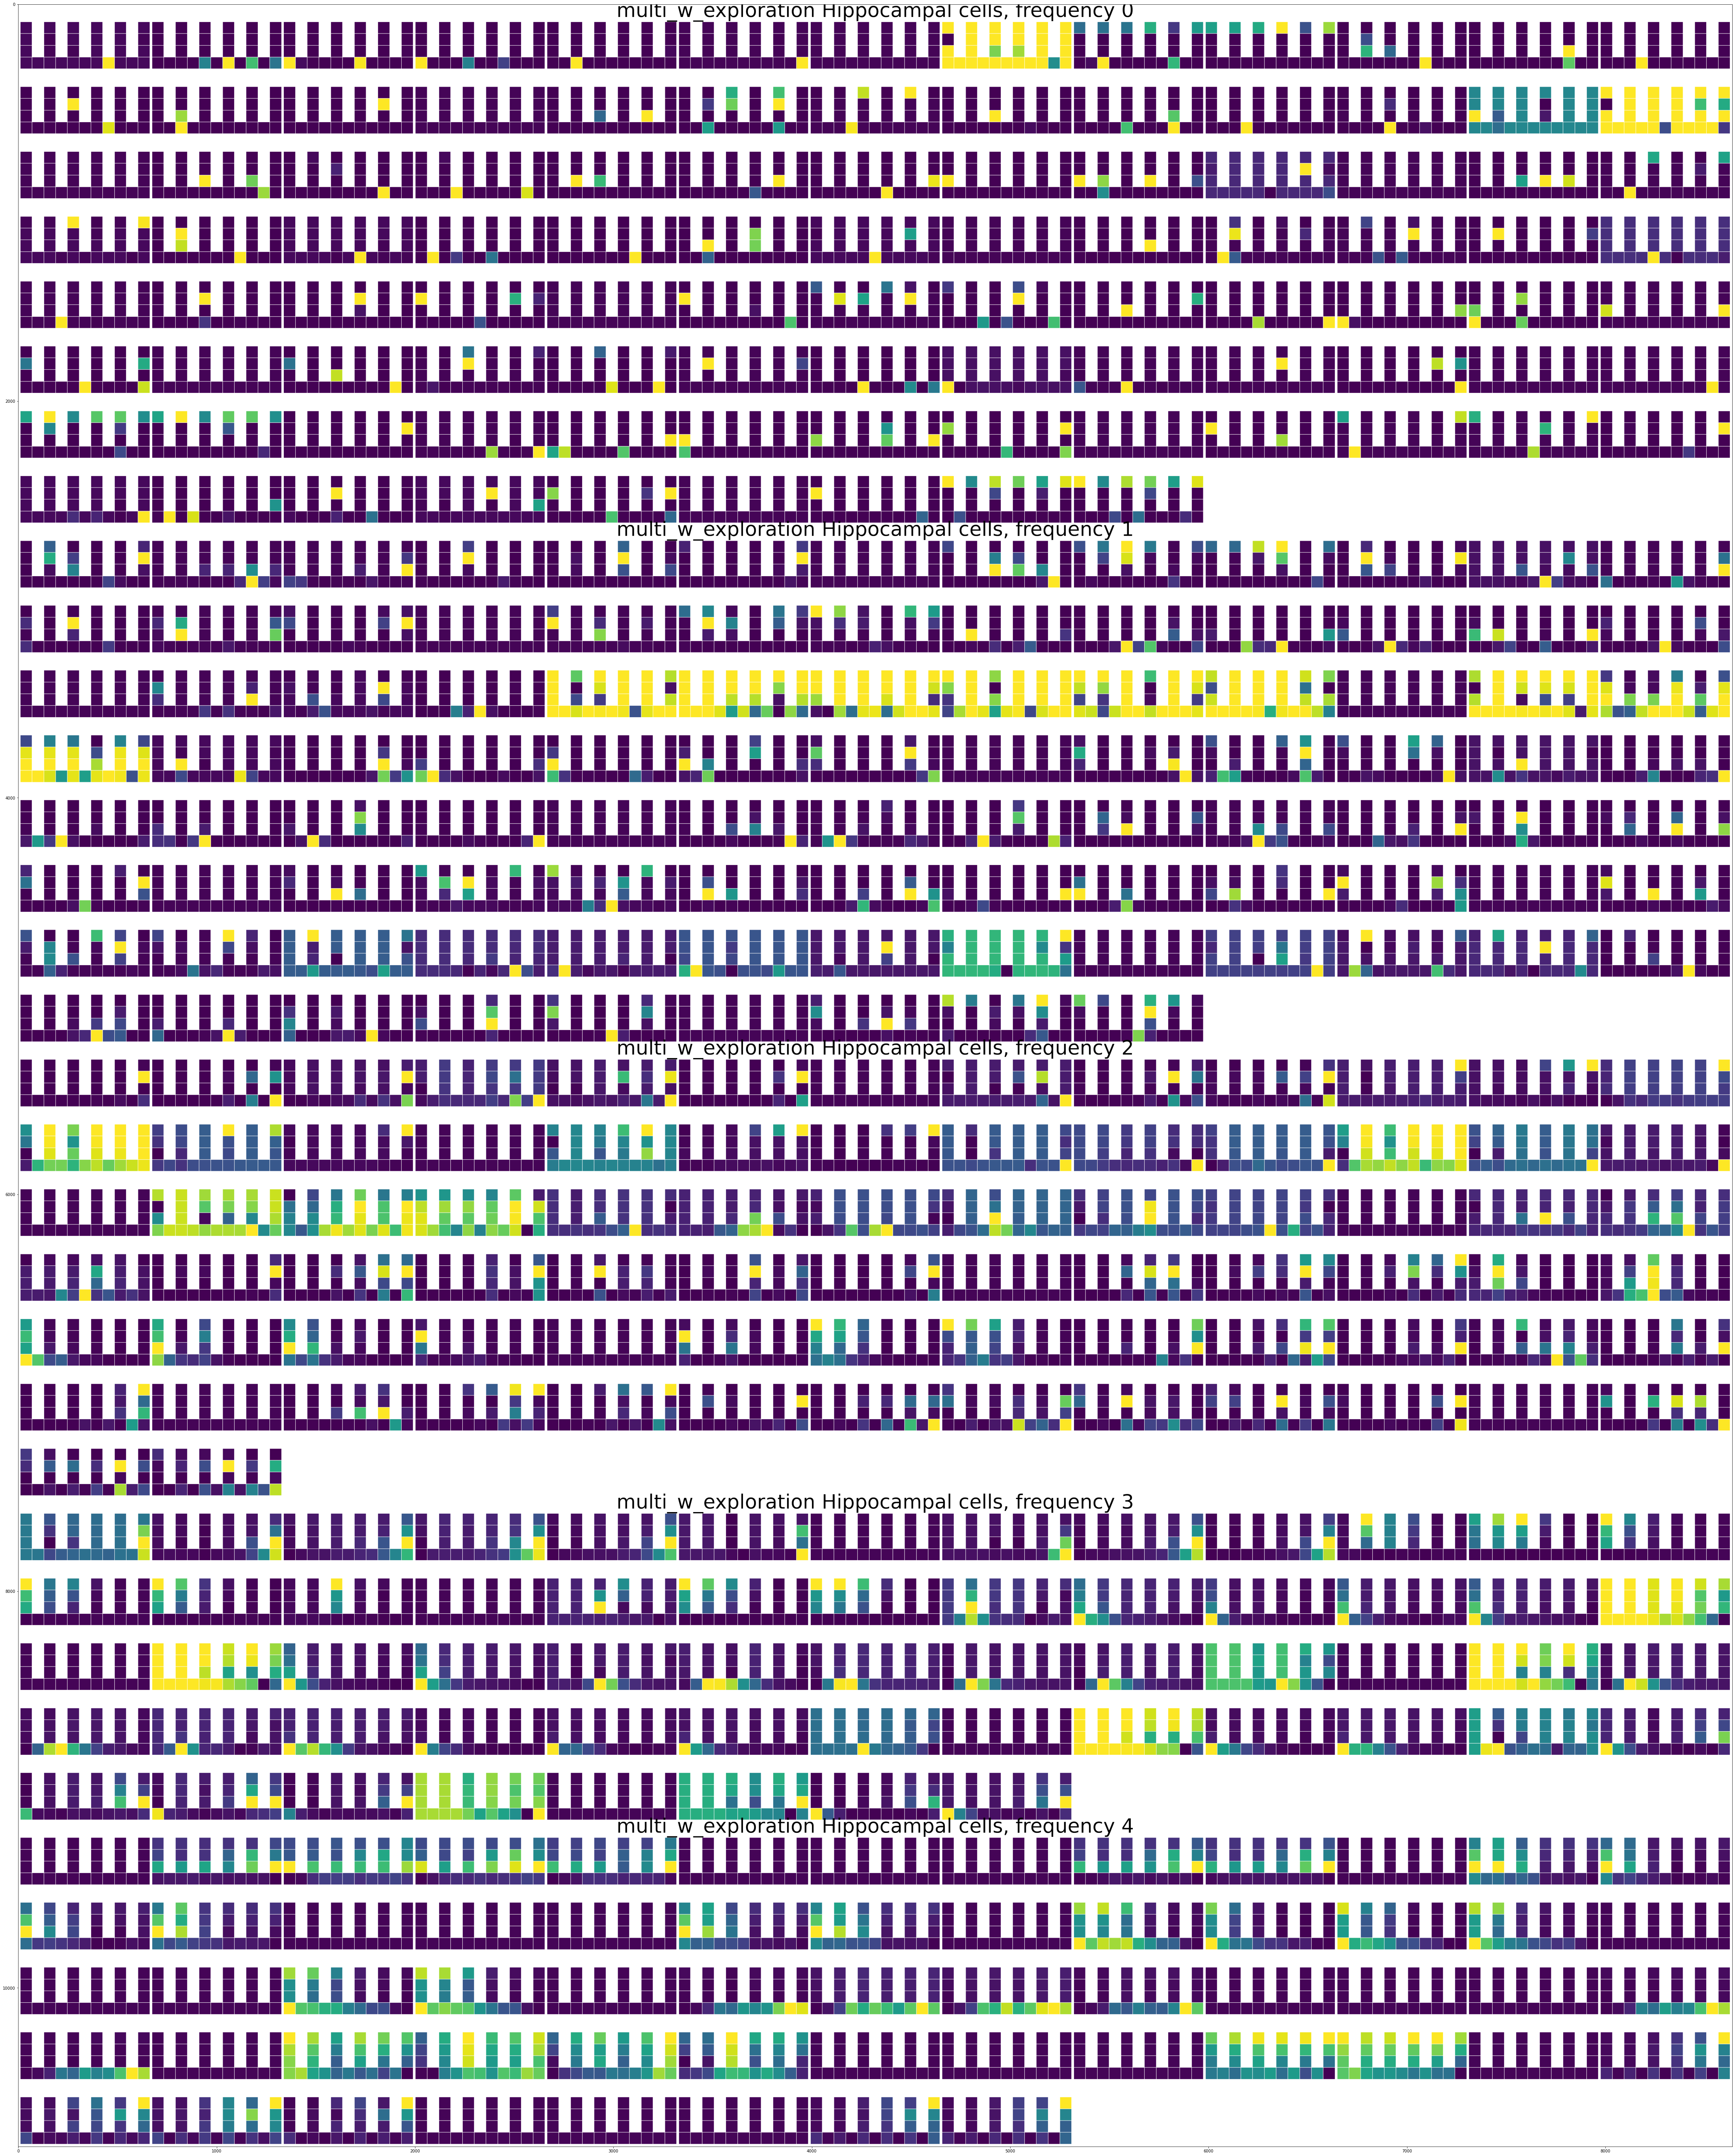

In [47]:
fig, ax = plt.subplots(figsize=(100, 100))

im = plt.imread(SAVE_DIR + 'index_{0}_seed_{1}_Hippocampal_cells.png'.format(IDX2, BEHAVIOR_SEED2))

ax.imshow(im)

In [ ]:
FREQUENCY = 0
plot.plot_single_frequency_all_cells_all_trajectories(all_p_random[0], frequency=FREQUENCY, environment=environments[0])

In [ ]:
FREQUENCY = 1
plot.plot_single_frequency_all_cells_all_trajectories(all_p_random[0], frequency=FREQUENCY, environment=environments[0])

In [ ]:
FREQUENCY = 2
plot.plot_single_frequency_all_cells_all_trajectories(all_p_random[0], frequency=FREQUENCY, environment=environments[0])

In [ ]:
FREQUENCY = 3
plot.plot_single_frequency_all_cells_all_trajectories(all_p_random[0], frequency=FREQUENCY, environment=environments[0])

In [ ]:
FREQUENCY = 4
plot.plot_single_frequency_all_cells_all_trajectories(all_p_random[0], frequency=FREQUENCY, environment=environments[0])

In [ ]:
trajectories = list(permutations(np.arange(6), r=2))

In [ ]:
trajectories

In [ ]:
def get_path(pred, start, goal):
    path = [goal]
    k = goal
    while pred[start, k] != -9999:
        path.append(pred[start, k])
        k = pred[start, k]
    return path[::-1]

In [ ]:
def get_trajectory_states(trajectory, environment):
    
    trajectory_dict = analyse.make_trajectory_dict()
    # Calculate graph properties for shortest path calculation between arms
    adjacency = np.array(environment.adjacency) 
    dists, pred = shortest_path(adjacency, directed=False, method='FW', return_predecessors=True)

    curr_arm_end_state = trajectory[0] * 5
    new_arm_end_state = trajectory[1] * 5
    # Using the adjacency matrix, create a trajectory using a shortest path traversal from end of curr_arm to end of new_arm
    #trajectory = self.get_path(pred, curr_arm_end_state, new_arm_end_state)[1:]
    #print(trajectory)
    
    return [environment.locations[state_id]['id'] for state_id in get_path(pred, curr_arm_end_state, new_arm_end_state)][1:]

In [ ]:
state_seq_a = np.array(get_trajectory_states((1, 0), envs[0]))
state_seq_b = np.array(get_trajectory_states((1, 2), envs[0]))
unambiguous_locs = state_seq_a != state_seq_b
print(state_seq_a)
print(state_seq_b)
print(state_seq_a[unambiguous_locs])
print(state_seq_b[unambiguous_locs])

In [ ]:
def linearize_trajectory(p_env, frequency, trajectory, cell_num, environment):

    trajectory_states = get_trajectory_states(trajectory, environment)
    trajectory_i = trajectory_dict[trajectory]
    
    linearized_rate = np.array(p_env[frequency][trajectory_i])[:, cell_num][trajectory_states]
    
    return linearized_rate

In [ ]:
def linearize_neighbor_trajectories(p_env, frequency, cell_num, environment):
    
    all_trajectories = analyse.make_trajectory_dict()
    neighbor_trajectories = [trajectory for trajectory in all_trajectories if abs(trajectory[0] - trajectory[1]) == 1]
    
    linearized_dict = {}
    
    for trajectory in neighbor_trajectories:
        linearized_dict[trajectory] = linearize_trajectory(p_env, frequency,  trajectory, cell_num, environment)
    
    return linearized_dict

In [ ]:
ld_sweep = linearize_neighbor_trajectories(all_p_sweep[0], 4, 36, environments[0])

In [ ]:
all_trajectories = analyse.make_trajectory_dict()
neighbor_trajectories = [trajectory for trajectory in all_trajectories if abs(trajectory[0] - trajectory[1]) == 1]


In [ ]:
all_p_sweep_nonnegative = analyse.make_all_p_nonnegative(all_p_sweep[0])
all_p_random_nonnegative = analyse.make_all_p_nonnegative(all_p_random[0])

In [ ]:
plot.plot_single_cell_all_trajectories(all_p_random[0], frequency=0, cell_num=44, environment=environments[0])